In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# import geopandas as gpd

from utils.map_utils import generate_3857_df, generate_lines,\
                            generate_buffers,generate_base_length\

from utils.routine_utils import generate_routine
            
import warnings
warnings.filterwarnings("ignore")

d:\my_programs_git\Transportation-Statistics-Course-Design\utils\maputils.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


generate_3857_df:   0%|          | 0/89 [00:00<?, ?it/s]

28

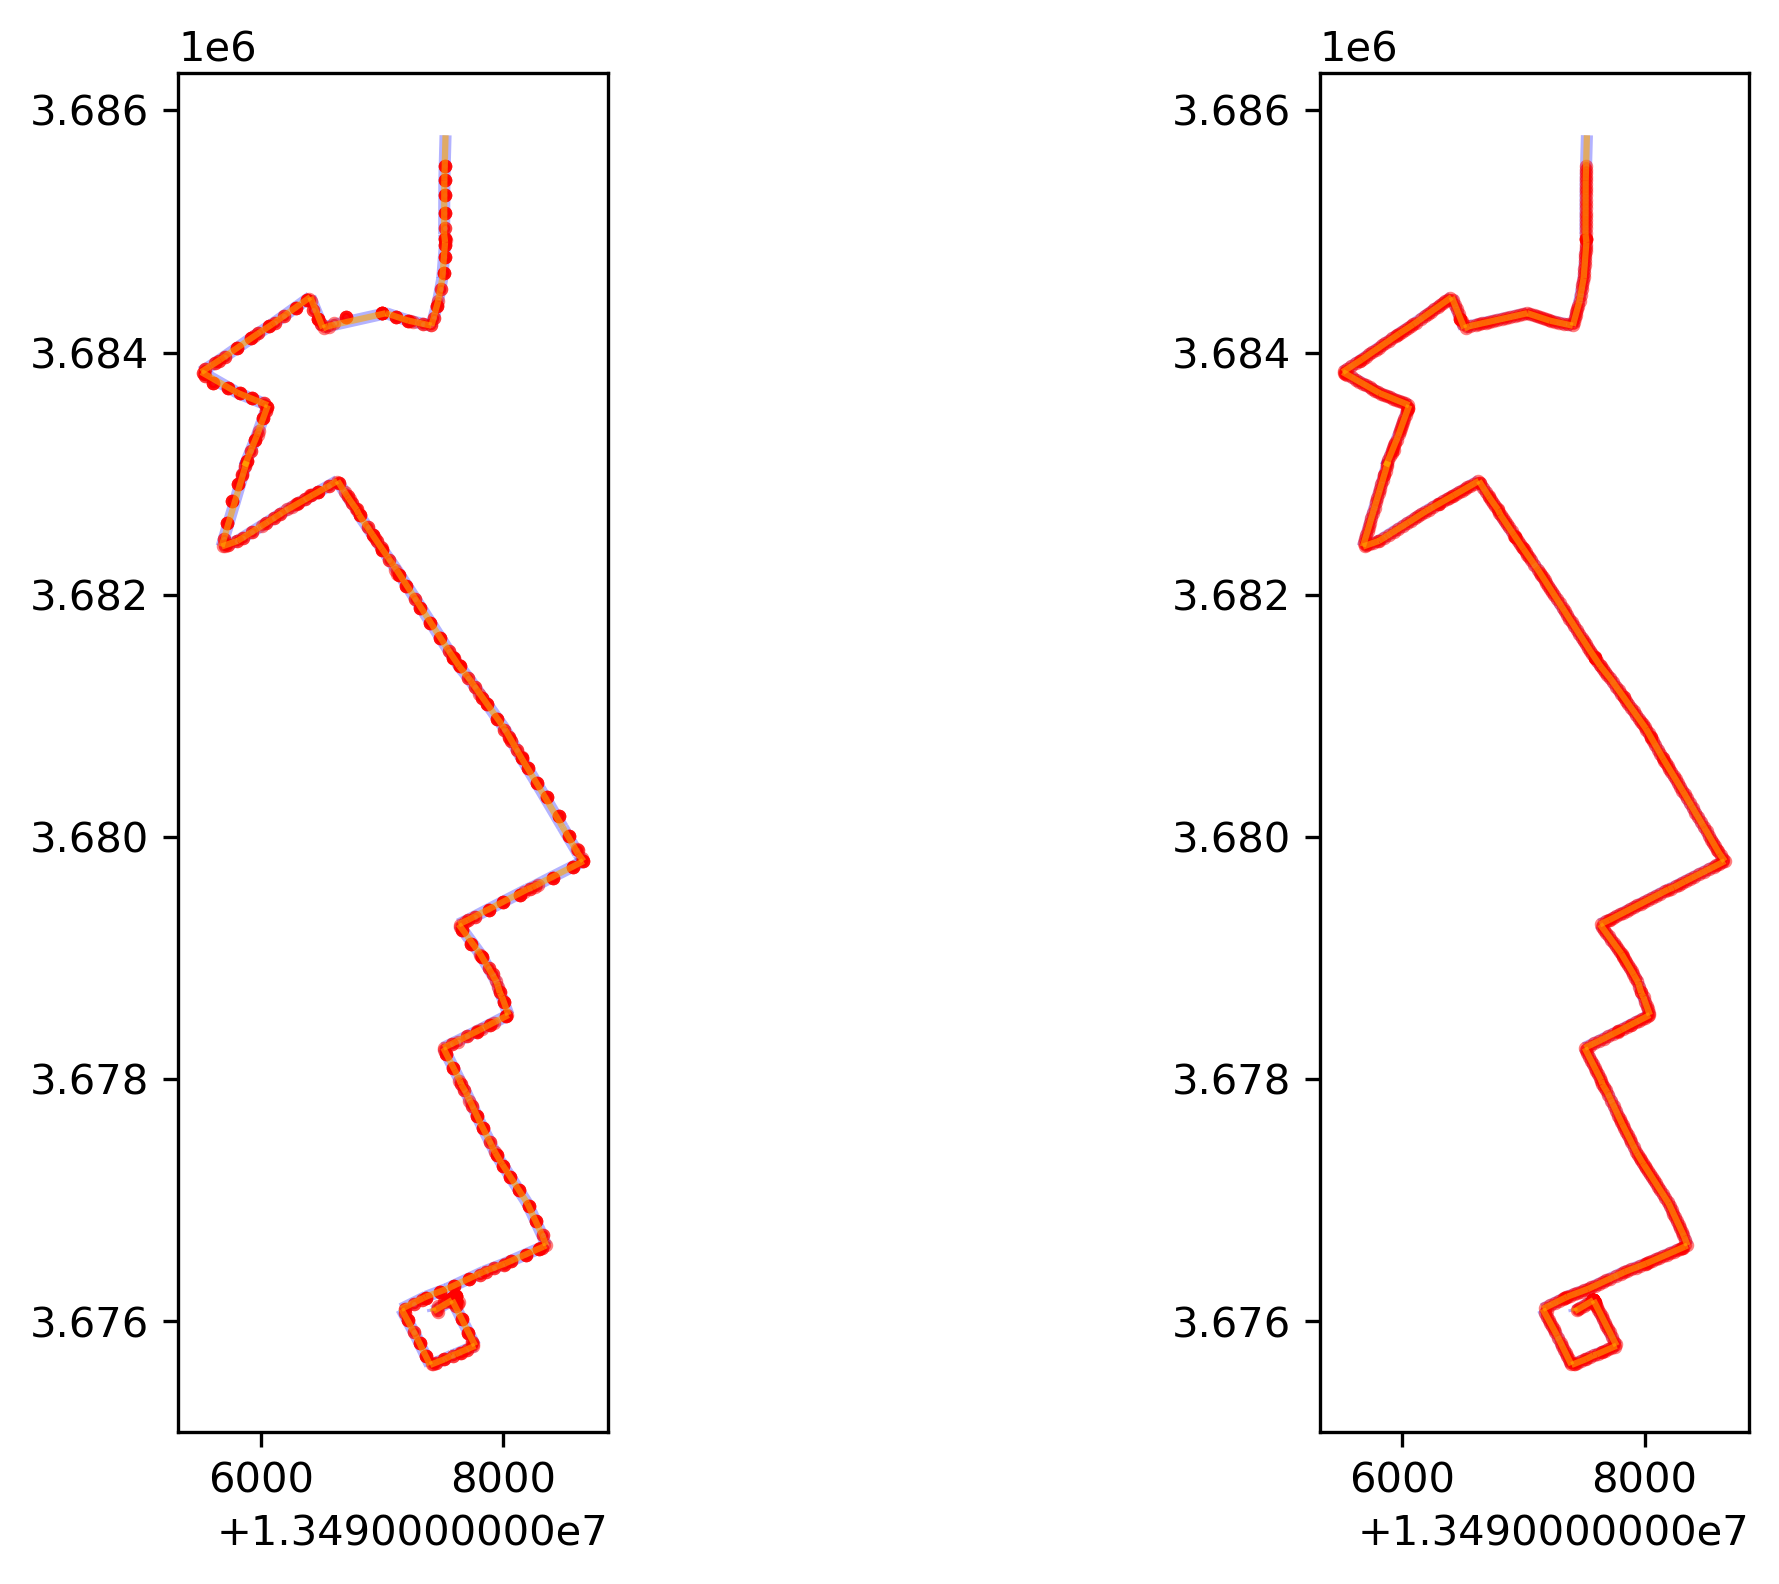

In [2]:
day = 7
nidx = 90
direction = 1
res = pd.read_pickle('./data/output/gps_{}.pkl'.format(day))
res.columns
len(res)

routine = generate_routine(res, nidx, direction)
if direction:
    mapdf = pd.read_excel('./data/map/map_down.xlsx')
else:
    mapdf = pd.read_excel('./data/map/map_up.xlsx')
mapdf = generate_3857_df(mapdf)
mapline = generate_lines(mapdf)
mapline = generate_buffers(mapline)
mapline = generate_base_length(mapline)

import geopandas as gpd
plt_mapline = gpd.GeoDataFrame(mapline)
plt_routine = gpd.GeoDataFrame(routine)
fig, ax = plt.subplots(1,2,figsize=(9,6),dpi=300)
plt_mapline['rect_buffer'].plot(ax = ax[0], color = 'blue', alpha=0.3)
plt_mapline.plot(ax = ax[0], color = 'orange',alpha=0.6)
plt_routine.plot(ax = ax[0], color = 'red', alpha = 0.5, markersize = 5)

plt_mapline['rect_buffer'].plot(ax = ax[1], color = 'blue', alpha=0.3)
plt_mapline.plot(ax = ax[1], color = 'orange',alpha=0.6)
adjusted_routine = gpd.GeoDataFrame({'geometry':plt_routine['adjusted_geometry']})
adjusted_routine.plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)

# ax[0].set_xlim((7800+1.349e7, 8700+1.349e7))
# ax[0].set_ylim((3.679e6, 3.682e6))
# ax[1].set_xlim((7800+1.349e7, 8700+1.349e7))
# ax[1].set_ylim((3.679e6, 3.682e6))
station_time_res = routine.loc[routine['station_status'] != 0, ['time','cum_length', 'station_status']].groupby('station_status').agg('mean').sort_values('time')
len(station_time_res)


In [6]:
station_time_res = routine.loc[routine['station_status'] != 0, ['time','cum_length', 'station_status']].groupby('station_status').agg('mean').sort_values('time')
# len(station_time_res)
station_time_res

,time,cum_length
station_status,,
双单路胜辛路,2021-09-07 14:46:14.000000000,904.535063
云屏路双丁路,2021-09-07 14:47:06.000000000,1281.316438
双丁路永盛路,2021-09-07 14:50:59.750000128,2490.842505
永盛路双丁路,2021-09-07 14:53:07.000000000,2949.677833
永盛路伊宁路,2021-09-07 14:54:12.000000000,3726.160682
永盛路天祝路,2021-09-07 14:55:27.000000000,4369.653966
塔秀路永盛路,2021-09-07 14:56:32.000000000,4829.314577
塔秀路德富路,2021-09-07 14:57:37.000000000,5126.408473
阿克苏路白银路,2021-09-07 14:58:29.000000000,5506.640217
